# Regression - Life Expectancy data

### <font color='red'> Project 2

### Regression Task 

- Apply any two models with bagging and any two models with pasting.
- Apply any two models with AdaBoost boosting.
- Apply gradient boosting.
- Apply PCA on data and then apply all the models in project 1 again on the post PCA data. Compare your results with    results in project 1. You don't need to apply all the models twice. Just copy the result from project 1, prepare a similar table for all the models after PCA and compare. Does PCA help in getting better results?
- Apply deep learning models (MLP) covered in class.

## Introduction

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years.

## Data Description

Country : Country

Year : Year

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population

Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years) 

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

thinness 5-9 years : Prevalence of thinness among children for Age 5 to 9(%)

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [3]:
df = pd.read_csv("C:/Users/PURUSHOTHAMAN MURVAS/Downloads/AML/Project/Project 2/Life Expectancy Data_afterNull.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,NaN,63.537231,2978599.0,18.2,18.2,0.454,9.5


### We need to strip the features names

In [4]:
df.columns = df.columns[:].str.strip() #strip removes both start and end
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2919 non-null float64
Adult Mortality                    2912 non-null float64
infant deaths                      2916 non-null float64
Alcohol                            2744 non-null float64
percentage expenditure             2816 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2840 non-null float64
BMI                                2837 non-null float64
under-five deaths                  2913 non-null float64
Polio                              2859 non-null float64
Total expenditure                  2691 non-null float64
Diphtheria                         2842 non-null float64
HIV/AIDS                           2885 no

### To find the null values in the dataset

In [6]:
df.isna().sum().sum()

3321

### Data PreProcessing

In [7]:
print("Alcohol                         : ",df['Alcohol'].isna().sum())
print("Hepatitis B                     : ",df['Hepatitis B'].isna().sum())
print("BMI                             : ",df['BMI'].isna().sum())
print("Polio                           : ",df['Polio'].isna().sum())
print("Life expectancy                 : ",df['Life expectancy'].isna().sum())
print("percentage expenditure          : ",df['percentage expenditure'].isna().sum())
print("Measles                         : ",df['Measles'].isna().sum())
print("under-five deaths               : ",df['under-five deaths'].isna().sum())
print("Total expenditure               : ",df['Total expenditure'].isna().sum())
print("Diphtheria                      : ",df['Diphtheria'].isna().sum())
print("HIV/AIDS                        : ",df['HIV/AIDS'].isna().sum())
print("GDP                             : ",df['GDP'].isna().sum())
print("Population                      : ",df['Population'].isna().sum())
print("thinness  1-19 years            : ",df['thinness  1-19 years'].isna().sum())
print("thinness 5-9 years              : ",df['thinness 5-9 years'].isna().sum())
print("Income composition of resources : ",df['Income composition of resources'].isna().sum())
print("Schooling                       : ",df['Schooling'].isna().sum())
print("infant deaths                   : ",df['infant deaths'].isna().sum())
print("Adult Mortality                 : ",df['Adult Mortality'].isna().sum())

Alcohol                         :  194
Hepatitis B                     :  553
BMI                             :  101
Polio                           :  79
Life expectancy                 :  19
percentage expenditure          :  122
Measles                         :  98
under-five deaths               :  25
Total expenditure               :  247
Diphtheria                      :  96
HIV/AIDS                        :  53
GDP                             :  468
Population                      :  675
thinness  1-19 years            :  67
thinness 5-9 years              :  46
Income composition of resources :  195
Schooling                       :  235
infant deaths                   :  22
Adult Mortality                 :  26


### Replacing the null values

In [8]:
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['Polio'].fillna(df['Polio'].mean(), inplace=True)
df['Life expectancy'].fillna(df['Life expectancy'].mean(), inplace=True)
df['percentage expenditure'].fillna(df['percentage expenditure'].mean(),inplace=True)
df['Measles'].fillna(df['Measles'].mean(),inplace=True)
df['under-five deaths'].fillna(df['under-five deaths'].mean(),inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(),inplace=True)
df['Diphtheria'].fillna(df['Diphtheria'].mean(),inplace=True)
df['HIV/AIDS'].fillna(df['HIV/AIDS'].mean(),inplace=True)
df['GDP'].fillna(df['GDP'].mean(),inplace=True)
df['Population'].fillna(df['Population'].mean(),inplace=True)
df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].mean(),inplace=True)
df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].mean(),inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(),inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(),inplace=True)
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(),inplace=True)
df['infant deaths'].fillna(df['infant deaths'].mode()[0],inplace=True)

In [9]:
df.isna().sum().sum()

0

## Exploratory Data Analysis

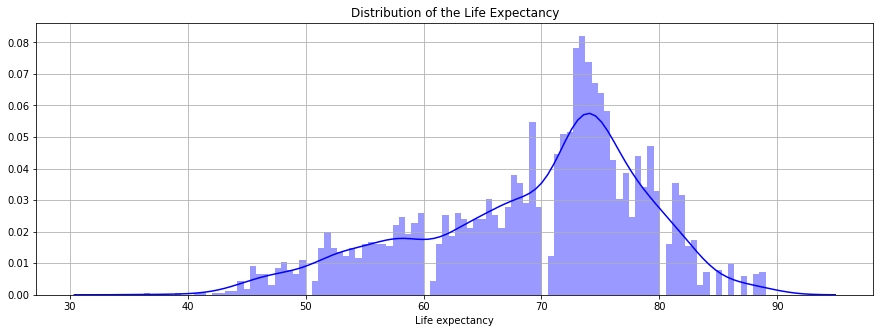

In [10]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title("Distribution of the Life Expectancy")
sns.distplot(df['Life expectancy'],color='b',bins=100,hist_kws={'alpha':0.4})

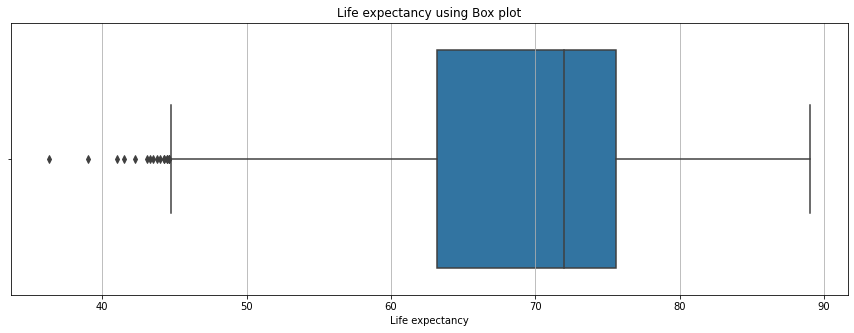

In [11]:
plt.figure(figsize=(15,5))
plt.title("Life expectancy using Box plot")
plt.grid()
sns.boxplot(x=df['Life expectancy'])

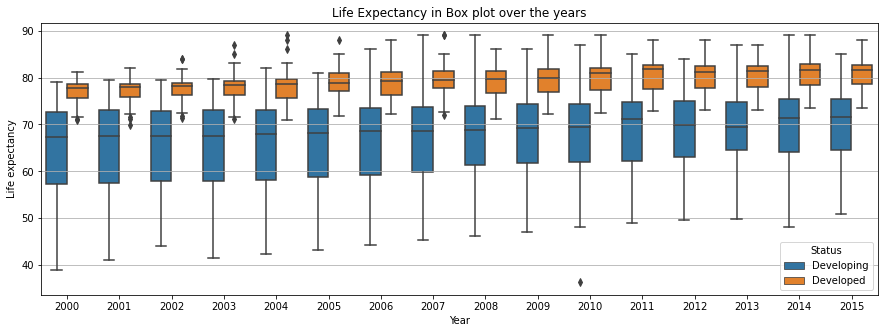

In [12]:
plt.figure(figsize=(15,5))
plt.title("Life Expectancy in Box plot over the years")
plt.grid()
sns.boxplot(x="Year", y="Life expectancy", hue = 'Status', data=df)

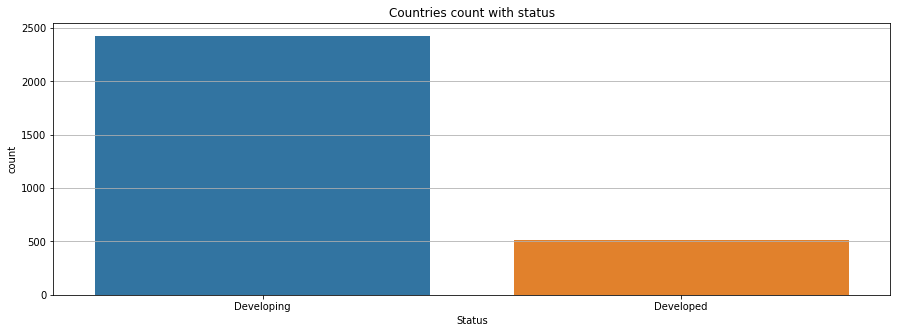

In [13]:
plt.figure(figsize=(15,5))
plt.title("Countries count with status")
plt.grid()
sns.countplot(x=df['Status'])

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-pack

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000239F810CEF0>,
      dtype=object)

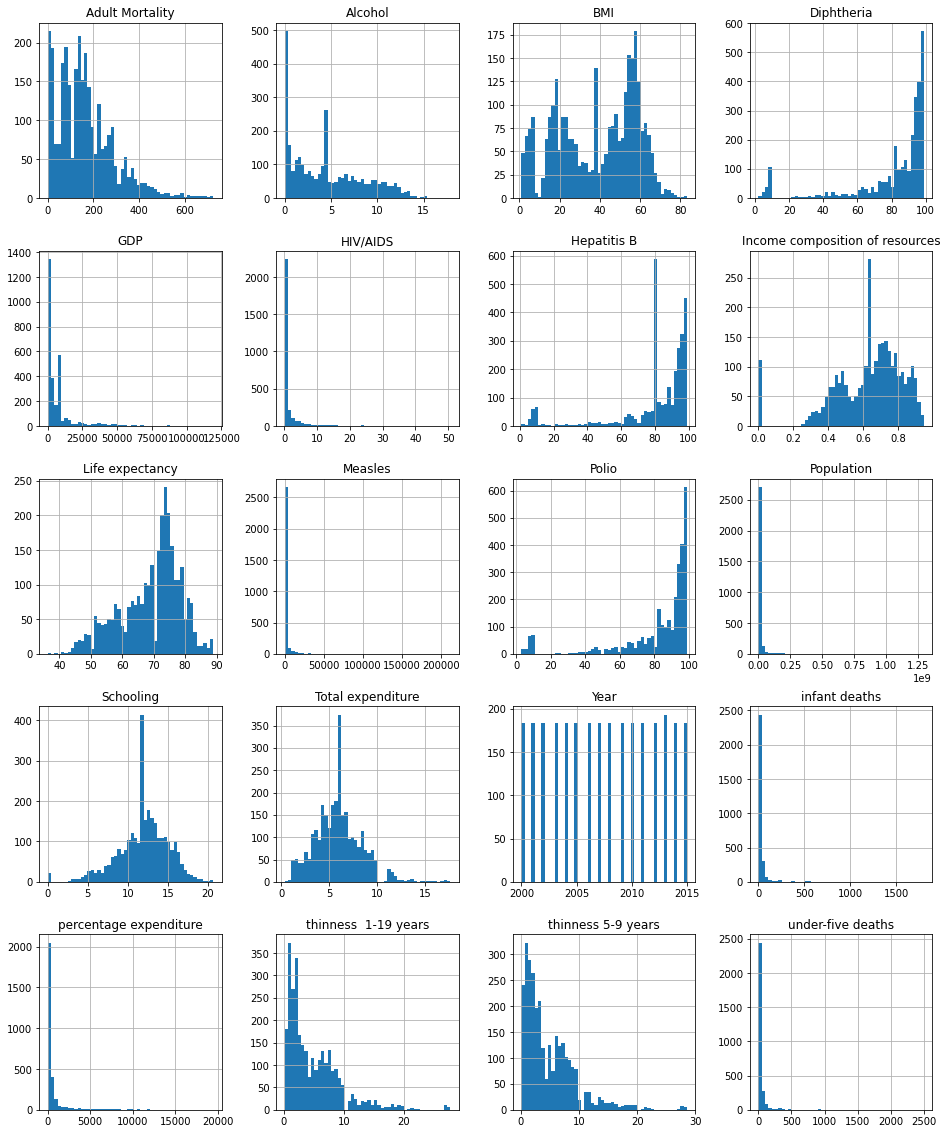

In [14]:
df.hist(figsize=(16,20),bins=50,xlabelsize=10,ylabelsize=10)

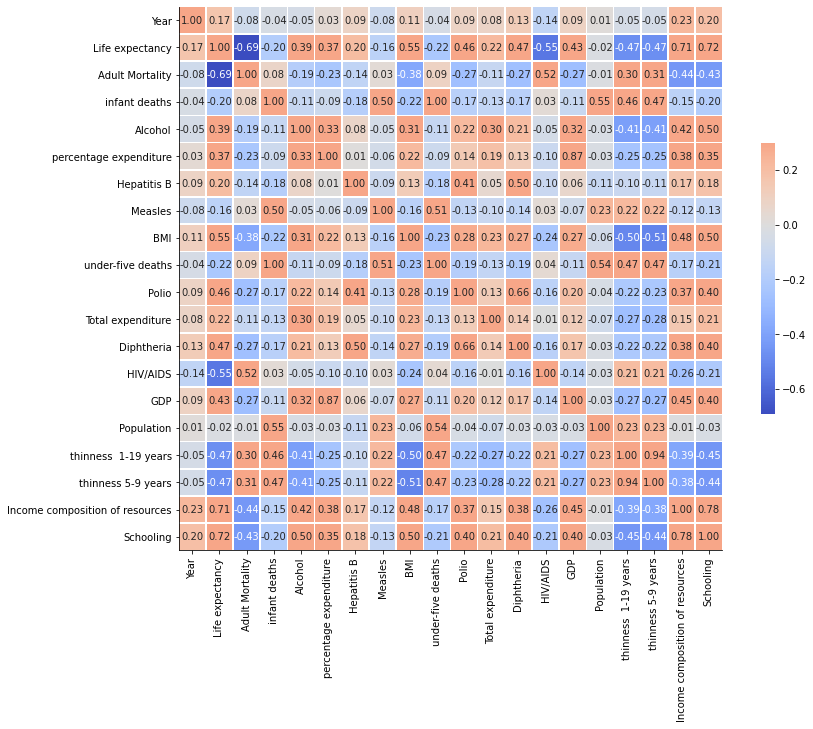

In [15]:
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
                annot=True, fmt='.2f', cmap='coolwarm')

sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

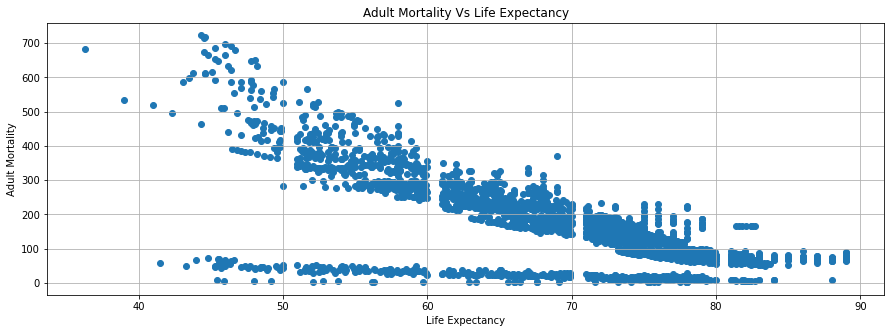

In [16]:
plt.figure(figsize=(15,5))
plt.title("Adult Mortality Vs Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Adult Mortality")
plt.grid()
plt.scatter(df['Life expectancy'],df['Adult Mortality'])

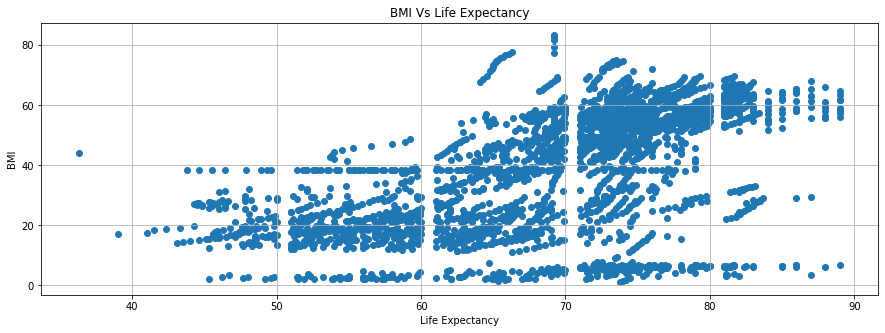

In [17]:
plt.figure(figsize=(15,5))
plt.title("BMI Vs Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("BMI")
plt.grid()
plt.scatter(df['Life expectancy'],df['BMI'])

### Drop the columns

In [18]:
df.drop(['Country'],inplace=True,axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null float64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null float64
BMI                                2938 non-null float64
under-five deaths                  2938 non-null float64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null float64
GDP                                2938 n

### Categorical column pre processing

In [20]:
df['Status']= df['Status'].map({'Developing':0,'Developed':1}).astype(int)
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,6.0,8.16,65.0,0.100000,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,58.0,8.18,62.0,0.100000,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,...,62.0,8.13,64.0,0.100000,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,67.0,8.52,67.0,0.100000,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,68.0,7.87,68.0,1.759792,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [21]:
cols = pd.get_dummies(df['Year'], prefix= 'Year')
df[cols.columns] = cols
df.drop('Year', axis = 1, inplace = True)
df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,0,0,0,0,0,0,0,0,0,1
1,0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,0,0,0,0,0,0,0,0,1,0
2,0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,0,0,0,0,0,0,0,1,0,0
3,0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,0,0,0,0,0,0,1,0,0,0
4,0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,0,0,0,0,0,1,0,0,0,0


### Choosing X and Y

In [22]:
x = df.drop('Life expectancy',axis=1)
x.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,...,0,0,0,0,0,0,0,0,0,1
1,0,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,...,0,0,0,0,0,0,0,0,1,0
2,0,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,...,0,0,0,0,0,0,0,1,0,0
3,0,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,...,0,0,0,0,0,0,1,0,0,0
4,0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
y = df['Life expectancy']
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [24]:
X_train_org, X_test_org, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Bagging and Pasting

### 1. Applying Bagging to KNN Regression Model

In [25]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=6)
bag_reg = BaggingRegressor(knn_reg, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [26]:

print('After Bagging to KNN Regression model, train score: {:.4f}'.format(bag_reg.score(X_train, y_train)))
print('After Bagging to KNN Regression model, test score : {:.4f}'.format(bag_reg.score(X_test, y_test)))

After Bagging to KNN Regression model, train score: 0.8489
After Bagging to KNN Regression model, test score : 0.7476


#### Even after bagging, KNN regression model dosen't show any significant improvement in their train and test scores

### 2. Applying Bagging to Decision tree Model

In [27]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth = 8, random_state=0)
bag_reg = BaggingRegressor(dt_reg, n_estimators=150, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [28]:
bag_reg.fit(X_train, y_train)
print('After Bagging to Decision tree model, Train score: {:.4f}'.format(bag_reg.score(X_train, y_train)))
print('After Bagging to Decision tree model, Test score : {:.4f}'.format(bag_reg.score(X_test, y_test)))

After Bagging to Decision tree model, Train score: 0.9769
After Bagging to Decision tree model, Test score : 0.9465


#### Naive model of decision tree model has a overfiiting result. After Bagging to decision tree model, decision tree model shows reasonable train and test scores and overcome the overfitting issue. 

### 1.Applying Pasting to KNN Regression Model

In [29]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=6)
bag_reg = BaggingRegressor(knn_reg, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [30]:
bag_reg.fit(X_train, y_train)
print('After pasting to KNN Regression model train score: {:.4f}'.format(bag_reg.score(X_train, y_train)))
print('After pasting to KNN Regression model test score : {:.4f}'.format(bag_reg.score(X_test, y_test)))

After pasting to KNN Regression model train score: 0.8413
After pasting to KNN Regression model test score : 0.7468


#### After pasting to KNN regression model, no change in train and test score 

### 2. Applying Pasting to Decision tree regressor Model

In [31]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth = 8, random_state=0)
bag_reg = BaggingRegressor(dt_reg, n_estimators=150, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [32]:
bag_reg.fit(X_train, y_train)
print('After applying pasting to Decision tree regressor model train score: {:.4f}'.format(bag_reg.score(X_train, y_train)))
print('After applying pasting to Decision tree regressor model test score : {:.4f}'.format(bag_reg.score(X_test, y_test)))

After applying pasting to Decision tree regressor model train score: 0.9651
After applying pasting to Decision tree regressor model test score : 0.9110


# Adaboost Boosting

### AdaBoost Model 1: Decision Tree

In [33]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8), n_estimators=100, learning_rate=0.1, random_state=0)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=8,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.1, loss='linear', n_estimators=100,
                  random_

In [34]:
print("Accuracy on training set: {:.4f}".format(ada_reg.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(ada_reg.score(X_test, y_test)))

Accuracy on training set: 0.9873
Accuracy on test set: 0.9528


### AdaBoost Model 2: Support Vector Machine (SVM)

In [35]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

ada_reg = AdaBoostRegressor(SVR(kernel='rbf',C=100, gamma=0.1), n_estimators=100, learning_rate=0.1, random_state=0)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                                     epsilon=0.1, gamma=0.1, kernel='rbf',
                                     max_iter=-1, shrinking=True, tol=0.001,
                                     verbose=False),
                  learning_rate=0.1, loss='linear', n_estimators=100,
                  random_state=0)

In [36]:
print("Accuracy on training set: {:.4f}".format(ada_reg.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(ada_reg.score(X_test, y_test)))

Accuracy on training set: 0.9134
Accuracy on test set: 0.8673


# Gradient Boosting

### Applying Gradient Boosting to the only model Decision Tree

In [37]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=8, n_estimators=100, learning_rate=0.1, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [38]:
print("Accuracy on training set: {:.4f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.9994
Accuracy on test set: 0.9544


# Principal Component Analysis

In [39]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca_regression = PCA(n_components = .95)
X_train_reg = pca_regression.fit_transform(X_train)
X_test_reg = pca_regression.transform(X_test)

### Number of features after applying PCA to the dataset

In [40]:
pca_regression.n_components_

23

## KNN Regression Model After PCA

In [41]:
from sklearn.neighbors import KNeighborsRegressor

param_grid={'n_neighbors':range(2,9)}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reg,y_train)

knn_ts=grid_search.score(X_test_reg, y_test)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.7500


Before PCA, the number of neighbors for the KNN model was 6,
After PCA, the number of neighbors for the same KNN model is 5

In [42]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_reg, y_train)
print('Train score on best parameters for KNN Regressor {:.4f}'.format(knn.score(X_train_reg,y_train)))
print('Test score on best parameters for KNN Regressor {:.4f}'.format(knn.score(X_test_reg,y_test)))

Train score on best parameters for KNN Regressor 0.8458
Test score on best parameters for KNN Regressor 0.7290


In [43]:
post_pca = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score'))

In [44]:
post_pca.loc[len(post_pca)]=[1,'KNN Regression','{n_neighbors:5}',knn.score(X_train_reg,y_train),knn.score(X_test_reg,y_test)]

In [45]:
post_pca

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{n_neighbors:5},0.845762,0.728985


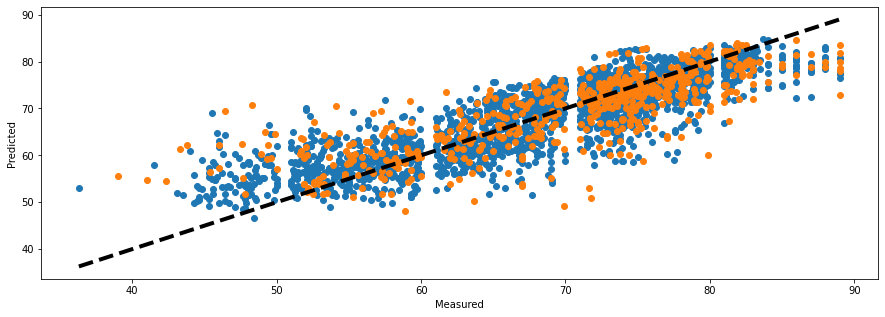

In [48]:
from sklearn.model_selection import cross_val_predict
#fig,ax = plt.subplots()
plt.figure(figsize=(15,5))
predicted = cross_val_predict(grid_search,X_train_reg,y_train, cv=5)
plt.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test_reg,y_test, cv=5)
plt.scatter(y_test, predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

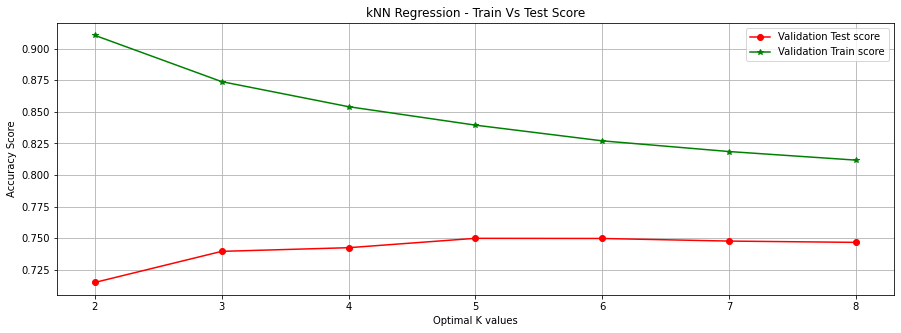

In [49]:
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15,5))
plt.plot(results['param_n_neighbors'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('kNN Regression - Train Vs Test Score')
plt.xlabel('Optimal K values')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid()

## Linear Regression  After PCA

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train_reg, y_train)
#cv_train=cross_val_score(lreg, X_train_reg, y_train, cv=5).mean()
test=lreg.score(X_test_reg, y_test)
print('Cross validation score                 : %.4f'%cross_val_score(lreg, X_train_reg, y_train, cv=5).mean())
print('After PCA Linear Regression Train score: %.4f'%lreg.score(X_train_reg, y_train))
print('After PCA Linear Regression Test score : %.4f'%lreg.score(X_test_reg, y_test))

Cross validation score                 : 0.7770
After PCA Linear Regression Train score: 0.7830
After PCA Linear Regression Test score : 0.7917


In [51]:
post_pca.loc[len(post_pca)]=[2,'Linear Regression','none',lreg.score(X_train_reg, y_train),test]
post_pca

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{n_neighbors:5},0.845762,0.728985
1,2,Linear Regression,none,0.783017,0.791686


## Ridge Regression  After PCA

In [52]:
from  sklearn.linear_model import Ridge

param_grid={'alpha':[0.001,0.01, 0.1, 1, 10, 100,1000]}

grid_searchR = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_searchR.fit(X_train_reg,y_train)

print("Best parameters: {}".format(grid_searchR.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchR.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.7771


After PCA, Ridge provides best parameter alpha=1, before PCA alpha=0.001

In [53]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_reg, y_train)
print('Train score on best parameters for Ridge regressor {:.4f}'.format(ridge.score(X_train_reg,y_train)))
print('Test score on best parameters for Ridge regressor {:.4f}'.format(ridge.score(X_test_reg,y_test)))

Train score on best parameters for Ridge regressor 0.7830
Test score on best parameters for Ridge regressor 0.7913


In [54]:
post_pca.loc[len(post_pca)]=[3,'Ridge Regression','{alpha:1}',ridge.score(X_train_reg,y_train),ridge.score(X_test_reg,y_test)]
post_pca

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{n_neighbors:5},0.845762,0.728985
1,2,Linear Regression,none,0.783017,0.791686
2,3,Ridge Regression,{alpha:1},0.782986,0.791303


Text(0, 0.5, 'Predicted')

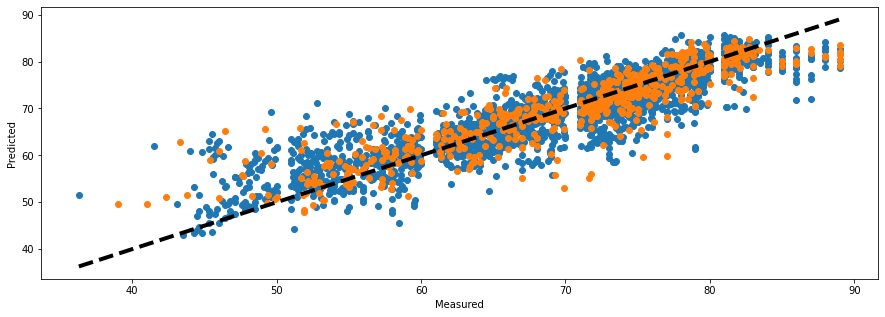

In [58]:
from sklearn.model_selection import cross_val_predict
plt.figure(figsize=(15,5))
predicted = cross_val_predict(grid_searchR,X_train_reg,y_train, cv=5)
plt.scatter(y_train, predicted)
predicted = cross_val_predict(grid_searchR,X_test_reg,y_test, cv=5)
plt.scatter(y_test, predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')

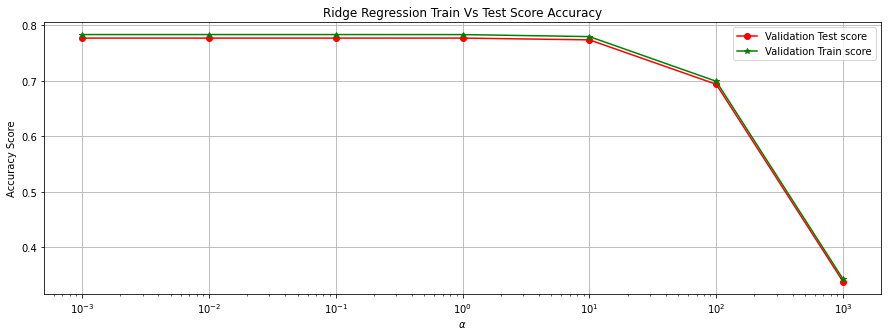

In [60]:
results = pd.DataFrame(grid_searchR.cv_results_)
plt.figure(figsize=(15,5))
plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Ridge Regression Train Vs Test Score Accuracy')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.grid()
plt.ylabel('Accuracy Score')
plt.legend()

## Lasso Regression after PCA

In [66]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [1000,100,10,1,0.1,0.01,0.001], 'max_iter': [10000]}
lasso_reg = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
lasso_reg.fit(X_train_reg, y_train)
print("Best cross-validation score: {:.4f}".format(lasso_reg.best_score_))
print("Best parameter             : {}".format(lasso_reg.best_params_))

Best cross-validation score: 0.7771
Best parameter             : {'alpha': 0.001, 'max_iter': 10000}


In [62]:
lasso = Lasso(alpha=0.001,max_iter=10000)
lasso.fit(X_train_reg, y_train)
print('Train score on best parameters for Lasso Regressor {:.4f}'.format(lasso.score(X_train_reg,y_train)))
print('Test score on best parameters for lasso Regressor {:.4f}'.format(lasso.score(X_test_reg,y_test)))

Train score on best parameters for Lasso Regressor 0.7830
Test score on best parameters for lasso Regressor 0.7916


In [63]:
post_pca.loc[len(post_pca)]=[4,'Lasso Regression','{alpha:0.1,max_iter=10000}',lasso.score(X_train_reg,y_train),lasso.score(X_test_reg,y_test)]
post_pca

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{n_neighbors:5},0.845762,0.728985
1,2,Linear Regression,none,0.783017,0.791686
2,3,Ridge Regression,{alpha:1},0.782986,0.791303
3,4,Lasso Regression,"{alpha:0.1,max_iter=10000}",0.783012,0.791623


Text(0, 0.5, 'Predicted')

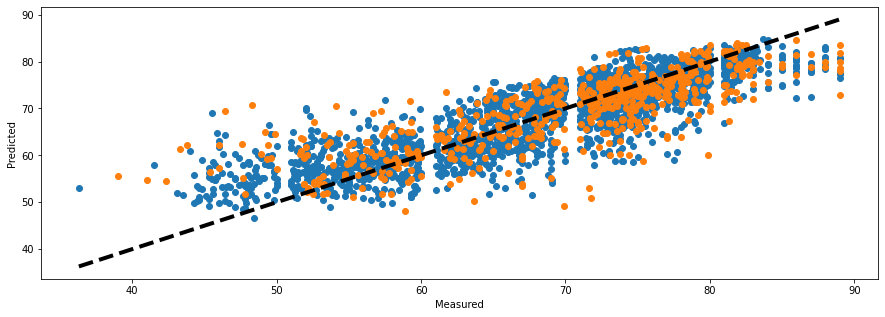

In [65]:
from sklearn.model_selection import cross_val_predict
plt.figure(figsize=(15,5))
predicted = cross_val_predict(grid_search,X_train_reg,y_train, cv=5)
plt.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test_reg,y_test, cv=5)
plt.scatter(y_test, predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')

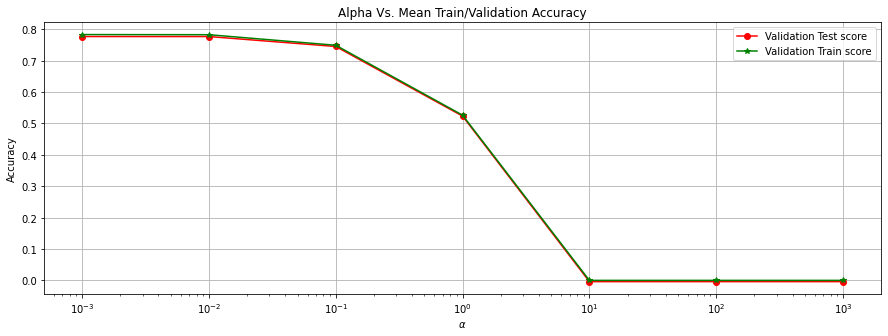

In [67]:
results = pd.DataFrame(lasso_reg.cv_results_)
plt.figure(figsize=(15,5))
plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.xscale('log')

## Polynomial Regression after PCA

In [68]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

train_score_poly = []
test_score_poly = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_reg_poly = poly.fit_transform(X_train_reg)
    X_test_reg_poly = poly.transform(X_test_reg)
    lreg.fit(X_train_reg_poly, y_train)
    train_score_poly.append(lreg.score(X_train_reg_poly, y_train))
    test_score_poly.append(lreg.score(X_test_reg_poly, y_test))


In [69]:
print(train_score_poly)
print(test_score_poly)

[0.7830170780287463, 0.8793059459202202, 1.0, 1.0]
[0.7916859169103183, 0.807894884821981, -554.0568954768332, -66.87268409069688]


In [70]:
print("Polynomial regression train score after PCA: ",train_score_poly[1])
print("Polynomial regression test score after PCA : ",test_score_poly[1])
print("Best Parameters degree, n=",2)

Polynomial regression train score after PCA:  0.8793059459202202
Polynomial regression test score after PCA :  0.807894884821981
Best Parameters degree, n= 2


In [71]:
post_pca.loc[len(post_pca)]=[5,'Polynomial Regression','{degree:2}',train_score_poly[1],test_score_poly[1]]

In [72]:
post_pca

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{n_neighbors:5},0.845762,0.728985
1,2,Linear Regression,none,0.783017,0.791686
2,3,Ridge Regression,{alpha:1},0.782986,0.791303
3,4,Lasso Regression,"{alpha:0.1,max_iter=10000}",0.783012,0.791623
4,5,Polynomial Regression,{degree:2},0.879306,0.807895


## Support Vector Machine After PCA - Linear SVR

In [73]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter':[10000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train_reg, y_train)
print("Best parameter             : {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameter             : {'C': 1, 'max_iter': 10000}
Best cross-validation score: 0.7758


Before PCA, best parameters and cross validation score for the Linear SVM model was 
" Best cross-validation score: 0.8033
  Best parameter             : {'C': 100, 'max_iter': 10000} "
After PCA, best parameters and Cross validation score for the same Linear SVM model is changed to 
" Best cross-validation score: 0.7757 
  Best parameter             : {'C': 1, 'max_iter': 10000} "

In [74]:
linSVR_best = LinearSVR(C=100, max_iter= 10000)
linSVR_best.fit(X_train_reg,y_train)

print('After PCA Linear SVM model Training score: {:.4f}'.format(linSVR_best.score(X_train_reg, y_train)))
print('After PCA Linear SVM model Test score    : {:.4f}'.format(linSVR_best.score(X_test_reg, y_test)))

After PCA Linear SVM model Training score: 0.7780
After PCA Linear SVM model Test score    : 0.7912


In [75]:
post_pca.loc[len(post_pca)]=[6,'Linear SVM ','{C:1, max_iter:10000}',linSVR_best.score(X_train_reg, y_train),linSVR_best.score(X_test_reg, y_test)]
post_pca

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{n_neighbors:5},0.845762,0.728985
1,2,Linear Regression,none,0.783017,0.791686
2,3,Ridge Regression,{alpha:1},0.782986,0.791303
3,4,Lasso Regression,"{alpha:0.1,max_iter=10000}",0.783012,0.791623
4,5,Polynomial Regression,{degree:2},0.879306,0.807895
5,6,Linear SVM,"{C:1, max_iter:10000}",0.777991,0.791225


## 'Linear' Kernalized Support Vector Machine After PCA

In [76]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter':[10000]}
svm_linear = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, return_train_score=True)
svm_linear.fit(X_train_reg, y_train)
print("Best parameter             : {}".format(svm_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(svm_linear.best_score_))

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_it

Best parameter             : {'C': 1, 'max_iter': 10000}
Best cross-validation score: 0.7758


Before PCA, best parameters and cross validation score for the Linear SVR model was 
" Best cross-validation score: 0.8011
  Best parameter             : {'C': 100, 'max_iter': 10000} "
After PCA, best parameters and Cross validation score for the same Linear SVR model is changed to 
" Best cross-validation score: 0.7758 
  Best parameter             : {'C': 1, 'max_iter': 10000} "

In [77]:
svm_linear_best = SVR(kernel='linear',C=1, max_iter= 10000)
svm_linear_best.fit(X_train_reg,y_train)

print('After PCA, Kernalized Support Vector machine -Linear Training score: {:.4f}'.format(svm_linear_best.score(X_train_reg, y_train)))
print('After PCA, Kernalized Support Vector machine -Linear Test score    : {:.4f}'.format(svm_linear_best.score(X_test_reg, y_test)))

After PCA, Kernalized Support Vector machine -Linear Training score: 0.7805
After PCA, Kernalized Support Vector machine -Linear Test score    : 0.7915


In [78]:
post_pca.loc[len(post_pca)]=[7,'SVC Kernel-Linear ','{C:1, max_iter:10000}',linSVR_best.score(X_train_reg, y_train),linSVR_best.score(X_test_reg, y_test)]
post_pca

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{n_neighbors:5},0.845762,0.728985
1,2,Linear Regression,none,0.783017,0.791686
2,3,Ridge Regression,{alpha:1},0.782986,0.791303
3,4,Lasso Regression,"{alpha:0.1,max_iter=10000}",0.783012,0.791623
4,5,Polynomial Regression,{degree:2},0.879306,0.807895
5,6,Linear SVM,"{C:1, max_iter:10000}",0.777991,0.791225
6,7,SVC Kernel-Linear,"{C:1, max_iter:10000}",0.777991,0.791225


## 'RBF' Kernalized Support Vector Machine After PCA

In [79]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100], 'gamma': [0.01,0.1,1,5] ,'max_iter':[10000]}
svm_rbf = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, return_train_score=True)

svm_rbf.fit(X_train_reg, y_train)
print("Best parameter             : {}".format(svm_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(svm_rbf.best_score_))

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_it

Best parameter             : {'C': 100, 'gamma': 0.1, 'max_iter': 10000}
Best cross-validation score: 0.8166


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [81]:
svm_rbf_best = SVR(kernel='rbf',C=100, gamma=0.1, max_iter= 10000)
svm_rbf_best.fit(X_train_reg,y_train)

print('After PCA, Kernalized Support Vector machine - RBF Training score: {:.4f}'.format(svm_rbf_best.score(X_train_reg, y_train)))
print('After PCA, Kernalized Support Vector machine - RBF Test score    : {:.4f}'.format(svm_rbf_best.score(X_test_reg, y_test)))

After PCA, Kernalized Support Vector machine - RBF Training score: 0.8443
After PCA, Kernalized Support Vector machine - RBF Test score    : 0.8277


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [82]:
post_pca.loc[len(post_pca)]=[8,'SVC Kernel-RBF ','{C:100, gamma:0.1, max_iter:10000}',svm_rbf_best.score(X_train_reg, y_train),svm_rbf_best.score(X_test_reg, y_test)]
post_pca

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{n_neighbors:5},0.845762,0.728985
1,2,Linear Regression,none,0.783017,0.791686
2,3,Ridge Regression,{alpha:1},0.782986,0.791303
3,4,Lasso Regression,"{alpha:0.1,max_iter=10000}",0.783012,0.791623
4,5,Polynomial Regression,{degree:2},0.879306,0.807895
5,6,Linear SVM,"{C:1, max_iter:10000}",0.777991,0.791225
6,7,SVC Kernel-Linear,"{C:1, max_iter:10000}",0.777991,0.791225
7,8,SVC Kernel-RBF,"{C:100, gamma:0.1, max_iter:10000}",0.844256,0.827684


## 'Poly' Kernalized support vector machine after PCA

In [83]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100,200], 'degree': [1,2,3] ,'epsilon':[.1], 'max_iter':[10000]}
svm_poly = GridSearchCV(SVR(kernel='poly'), param_grid, cv=5, return_train_score=True)

svm_poly.fit(X_train_reg, y_train)
print("Best cross-validation score: {:.4f}".format(svm_poly.best_score_))
print("Best parameter             : {}".format(svm_poly.best_params_))

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anac

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anac

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anac

Best cross-validation score: 0.7743
Best parameter             : {'C': 10, 'degree': 1, 'epsilon': 0.1, 'max_iter': 10000}


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Cross Validation score and Best parameters before PCA, 
" Best cross-validation score: 0.7994
  Best parameter             : {'C': 200, 'degree': 2, 'epsilon': 0.1, 'max_iter': 10000} "
After PCA,
" Best cross-validation score: 0.7743
  Best parameter             : {'C': 10, 'degree': 1, 'epsilon': 0.1, 'max_iter': 10000} "

In [84]:
svm_poly_best = SVR(kernel='poly',C=10,degree=1, epsilon=0.1,max_iter= 10000,coef0=4)
svm_poly_best.fit(X_train_reg,y_train)

print('After PCA, Kernalized Support Vector machine - Poly Training score: {:.4f}'.format(svm_poly_best.score(X_train_reg, y_train)))
print('After PCA, Kernalized Support Vector machine - Poly Test score    : {:.4f}'.format(svm_poly_best.score(X_test_reg, y_test)))

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


After PCA, Kernalized Support Vector machine - Poly Training score: 0.7800
After PCA, Kernalized Support Vector machine - Poly Test score    : 0.7894


In [85]:
post_pca.loc[len(post_pca)]=[9,'SVC Kernel-Poly ','{C: 10, degree: 1, epsilon: 0.1, max_iter: 10000}',svm_poly_best.score(X_train_reg, y_train),svm_poly_best.score(X_test_reg, y_test)]
post_pca

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{n_neighbors:5},0.845762,0.728985
1,2,Linear Regression,none,0.783017,0.791686
2,3,Ridge Regression,{alpha:1},0.782986,0.791303
3,4,Lasso Regression,"{alpha:0.1,max_iter=10000}",0.783012,0.791623
4,5,Polynomial Regression,{degree:2},0.879306,0.807895
5,6,Linear SVM,"{C:1, max_iter:10000}",0.777991,0.791225
6,7,SVC Kernel-Linear,"{C:1, max_iter:10000}",0.777991,0.791225
7,8,SVC Kernel-RBF,"{C:100, gamma:0.1, max_iter:10000}",0.844256,0.827684
8,9,SVC Kernel-Poly,"{C: 10, degree: 1, epsilon: 0.1, max_iter: 10000}",0.780029,0.789378


## After PCA, Decision tree regression

In [86]:
import math
from sklearn.tree import DecisionTreeRegressor
#Fitting the model
reg = DecisionTreeRegressor()
reg.fit(X_train_reg,y_train)
pred = reg.predict(X_test_reg)

In [87]:
from sklearn.model_selection import GridSearchCV 
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid = GridSearchCV(reg, param_grid, refit = True, verbose = 1, n_jobs = -1) 
grid.fit(X_train_reg, y_train)

grid.best_params_


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:   21.3s finished


{'criterion': 'mse',
 'max_depth': 6,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 40}

In [88]:
print('After PCA, decision tree regressor training score: ', grid.score(X_train_reg,y_train))
print('After PCA, decision tree regressor test score    : ', grid.score(X_test_reg,y_test))

After PCA, decision tree regressor training score:  0.8194147412422793
After PCA, decision tree regressor test score    :  0.7367710747650162


In [89]:
post_pca.loc[len(post_pca)]=[10,'DecisionTreeRegression','{criterion: mse, max_depth: 6, max_leaf_nodes: 100, min_samples_leaf: 20, min_samples_split: 10}',grid.score(X_train_reg, y_train),grid.score(X_test_reg, y_test)]
post_pca

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{n_neighbors:5},0.845762,0.728985
1,2,Linear Regression,none,0.783017,0.791686
2,3,Ridge Regression,{alpha:1},0.782986,0.791303
3,4,Lasso Regression,"{alpha:0.1,max_iter=10000}",0.783012,0.791623
4,5,Polynomial Regression,{degree:2},0.879306,0.807895
5,6,Linear SVM,"{C:1, max_iter:10000}",0.777991,0.791225
6,7,SVC Kernel-Linear,"{C:1, max_iter:10000}",0.777991,0.791225
7,8,SVC Kernel-RBF,"{C:100, gamma:0.1, max_iter:10000}",0.844256,0.827684
8,9,SVC Kernel-Poly,"{C: 10, degree: 1, epsilon: 0.1, max_iter: 10000}",0.780029,0.789378
9,10,DecisionTreeRegression,"{criterion: mse, max_depth: 6, max_leaf_nodes:...",0.819415,0.736771


Text(0, 0.5, 'AccuracyScore')

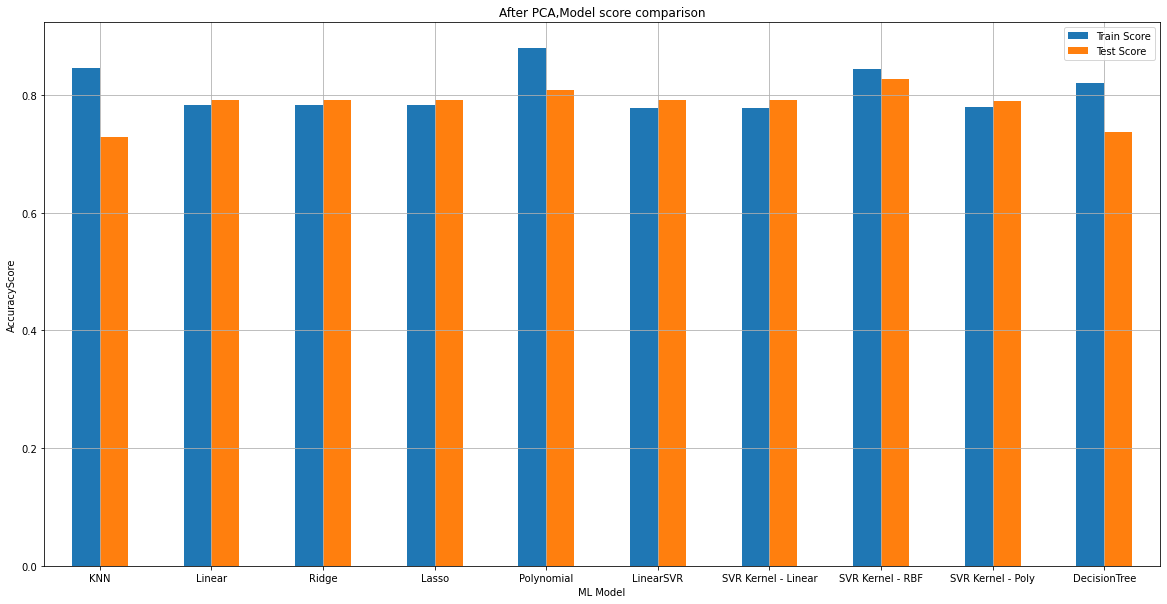

In [123]:
from matplotlib.pyplot import figure
Trainscore = [0.8457,0.7830,0.7829,0.7830,0.8793,0.7780,0.7780,0.8442,0.7800,0.8194]
Testscore = [0.7289,0.7916,0.7913,0.7916,0.8078,0.7913,0.7913,0.8276,0.7893,0.7367]
#plt.figure(figsize=(15,5))
index = ['KNN','Linear','Ridge','Lasso','Polynomial','LinearSVR','SVR Kernel - Linear','SVR Kernel - RBF','SVR Kernel - Poly','DecisionTree']
df = pd.DataFrame({'Train Score': Trainscore,
                   'Test Score': Testscore}, index=index)

ax = df.plot.bar(rot=0,figsize=(20,10),grid=True)
plt.title("After PCA, model score comparison")
plt.xlabel("ML Model")
plt.ylabel("AccuracyScore")


## Train and Test score of the models Before and After PCA

In [91]:
outside = ['Before PCA(Project1)','Before PCA(Project1)','After PCA(Project2)','After PCA(Project1)']
inside = ['Training Accuracy','Test Accuracy','Training Accuracy','Test Accuracy']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [92]:
data_reg = np.array([(0.8413,0.8224,0.8224,0.8206,0.8224,0.8113,0.8107,0.8994,0.8492,1.0000),
                     (0.7468,0.8237,0.8237,0.8220,0.8237,0.8142,0.8153,0.8756,0.8408,0.9085),
                     (0.8457,0.7830,0.7829,0.7830,0.8793,0.7780,0.7780,0.8442,0.7800,0.8194),
                     (0.7289,0.7916,0.7913,0.7916,0.8078,0.7913,0.7913,0.8276,0.7893,0.7367)])

In [93]:
df = pd.DataFrame(data_reg,index=hier_index,columns=['KNN','Linear','Ridge','Lasso','Polynomial','LinearSVR','SVR Kernel - Linear','SVR Kernel - RBF','SVR Kernel - Poly','DecisionTree'])

In [94]:
import seaborn as sns

cm = sns.light_palette("#2ecc71", as_cmap=True)

s = df.style.background_gradient(cmap='RdYlGn')
s

## Conclusion For PCA

1. Before PCA in Project 1, the best model was the SVC Kernal - RBF with Train score of 0.8994 and Test score of 0.8756
2. We could see the changes in the best parameters between before and after PCA models. But, only polynomial regression model outperformed its initial result after using PCA.  
3. Comparing the best model between before and after PCA, SVR Kernel - RBF has the best result. Though, we can see that the Post-PCA model had a marginally lower test score. 
4. The number of features have been reduced to 23 from 35. But this does not help us to get better results. Though the models were executed faster than the naive models. 

# Deep-Learning Models

In [95]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [96]:
#step 1: build model
model = Sequential()
#input layer
model.add(Dense(20, input_dim = 35, activation = 'relu'))
#hidden layers
#output layer
model.add(Dense(1))

#step 2: make computational graph - compile
model.compile(loss= 'mse' , optimizer = 'adam',metrics = ['mse'] )

#step 3: train the model - fit
model.fit(X_train, y_train, epochs = 100, batch_size = 40);

Epoch 1/100
59/59 [==============================] - 0s 866us/step - loss: 4813.3462 - mse: 4813.3462
Epoch 2/100
59/59 [==============================] - 0s 642us/step - loss: 4541.9023 - mse: 4541.9023
Epoch 3/100
59/59 [==============================] - 0s 727us/step - loss: 4135.3428 - mse: 4135.3428
Epoch 4/100
59/59 [==============================] - 0s 727us/step - loss: 3624.7073 - mse: 3624.7073
Epoch 5/100
59/59 [==============================] - 0s 727us/step - loss: 3051.0125 - mse: 3051.0125
Epoch 6/100
59/59 [==============================] - 0s 729us/step - loss: 2456.7815 - mse: 2456.7815
Epoch 7/100
59/59 [==============================] - 0s 659us/step - loss: 1884.8149 - mse: 1884.8149
Epoch 8/100
59/59 [==============================] - 0s 794us/step - loss: 1374.4209 - mse: 1374.4209
Epoch 9/100
59/59 [==============================] - 0s 693us/step - loss: 951.2256 - mse: 951.2256
Epoch 10/100
59/59 [==============================] - 0s 673us/step - loss: 626.8736

59/59 [==============================] - 0s 685us/step - loss: 28.1443 - mse: 28.1443
Epoch 84/100
59/59 [==============================] - 0s 588us/step - loss: 27.6872 - mse: 27.6872
Epoch 85/100
59/59 [==============================] - 0s 664us/step - loss: 27.2960 - mse: 27.2960
Epoch 86/100
59/59 [==============================] - 0s 798us/step - loss: 26.8790 - mse: 26.8790
Epoch 87/100
59/59 [==============================] - 0s 677us/step - loss: 26.4647 - mse: 26.4647
Epoch 88/100
59/59 [==============================] - 0s 631us/step - loss: 26.0913 - mse: 26.0913
Epoch 89/100
59/59 [==============================] - 0s 596us/step - loss: 25.7057 - mse: 25.7057
Epoch 90/100
59/59 [==============================] - 0s 645us/step - loss: 25.3708 - mse: 25.3708
Epoch 91/100
59/59 [==============================] - 0s 651us/step - loss: 24.9960 - mse: 24.9960
Epoch 92/100
59/59 [==============================] - 0s 597us/step - loss: 24.6545 - mse: 24.6545
Epoch 93/100
59/59 [===

### Perceptron model evaulation metrics:

In [97]:
model.evaluate(X_train, y_train)

74/74 [==============================] - 0s 658us/step - loss: 22.1926 - mse: 22.1926


[22.192588806152344, 22.192588806152344]

In [98]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 682us/step - loss: 22.0171 - mse: 22.0171


[22.017051696777344, 22.017051696777344]

### R Squared score for perceptron

In [99]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.4f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.4f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.7536
Test score: 0.7581


### Single layer Perceptron with Gridsearch

In [100]:
def create_model():
    #step 1: build model
    model = Sequential()
    #input layer
    model.add(Dense(20, input_dim = 35, activation = 'relu'))
    #output layer
    model.add(Dense(1))

    #step 2: make computational graph - compile
    model.compile(loss= 'mse' ,optimizer = 'adam', metrics = ['mse'] )
    return model

In [101]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[20,40,100] , 'epochs':[50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [102]:
grid_search_result = grid_search.fit(X_train, y_train)

In [103]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'batch_size': 20, 'epochs': 100}
Best cross-validation score: -17.73


In [104]:
# Step 3: Fit the model
model.fit(X_train, y_train.values, epochs=100, batch_size=20)

### R Squared score for perceptron

In [105]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.4f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.4f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.8149
Test score: 0.8152


## 2. Multi layer perceptron 

In [106]:
import tensorflow as tf
from tensorflow import keras as ker
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [107]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(30, input_dim = 35, activation = 'relu'))
#hidden layers
model1.add(Dense(20, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
#output layer
model1.add(Dense(1))

#step 2: make computational graph - compile
model1.compile(loss= 'mse' , optimizer = 'adam',metrics = ['mse'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 100, batch_size = 20);

Epoch 1/100
118/118 [==============================] - 0s 705us/step - loss: 4667.5596 - mse: 4667.5596
Epoch 2/100
118/118 [==============================] - 0s 631us/step - loss: 1428.1458 - mse: 1428.1458
Epoch 3/100
118/118 [==============================] - 0s 642us/step - loss: 74.4548 - mse: 74.4548
Epoch 4/100
118/118 [==============================] - 0s 658us/step - loss: 64.0264 - mse: 64.0264
Epoch 5/100
118/118 [==============================] - 0s 755us/step - loss: 53.5916 - mse: 53.5916
Epoch 6/100
118/118 [==============================] - 0s 703us/step - loss: 44.3652 - mse: 44.3652
Epoch 7/100
118/118 [==============================] - 0s 587us/step - loss: 37.1136 - mse: 37.1136
Epoch 8/100
118/118 [==============================] - 0s 608us/step - loss: 31.4197 - mse: 31.4197
Epoch 9/100
118/118 [==============================] - 0s 766us/step - loss: 27.0095 - mse: 27.0095
Epoch 10/100
118/118 [==============================] - 0s 781us/step - loss: 23.9721 - mse:

118/118 [==============================] - 0s 744us/step - loss: 12.0185 - mse: 12.0185
Epoch 82/100
118/118 [==============================] - 0s 687us/step - loss: 11.8292 - mse: 11.8292
Epoch 83/100
118/118 [==============================] - 0s 641us/step - loss: 11.8690 - mse: 11.8690
Epoch 84/100
118/118 [==============================] - 0s 649us/step - loss: 11.6104 - mse: 11.6104
Epoch 85/100
118/118 [==============================] - 0s 673us/step - loss: 11.7642 - mse: 11.7642
Epoch 86/100
118/118 [==============================] - 0s 692us/step - loss: 11.7418 - mse: 11.7418
Epoch 87/100
118/118 [==============================] - 0s 693us/step - loss: 11.6295 - mse: 11.6295
Epoch 88/100
118/118 [==============================] - 0s 647us/step - loss: 11.9298 - mse: 11.9298
Epoch 89/100
118/118 [==============================] - 0s 622us/step - loss: 11.5844 - mse: 11.5844
Epoch 90/100
118/118 [==============================] - 0s 624us/step - loss: 11.6032 - mse: 11.6032
Epo

### Perceptron model evaulation metrics:

In [108]:
model1.evaluate(X_train, y_train)

74/74 [==============================] - 0s 498us/step - loss: 11.0636 - mse: 11.0636


[11.063605308532715, 11.063605308532715]

In [109]:
model1.evaluate(X_test, y_test)

19/19 [==============================] - 0s 578us/step - loss: 13.1206 - mse: 13.1206


[13.120553970336914, 13.120553970336914]

### R Squared score for perceptron

In [110]:
from sklearn.metrics import r2_score

y_train_predict = model1.predict(X_train)
y_test_predict = model1.predict(X_test)

print('Train score: {:.4f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.4f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.8772
Test score: 0.8558


### Multilayer Perceptron with Gridsearch

In [111]:
def create_model():
    #step 1: build model
    model = Sequential()
    #input layer
    model.add(Dense(20, input_dim = 35, activation = 'relu'))
    #hidden layers
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    #output layer
    model.add(Dense(1))

    #step 2: make computational graph - compile
    model.compile(loss= 'mse' ,optimizer = 'adam', metrics = ['mse'] )
    return model

In [112]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[20,40,100] , 'epochs':[50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [113]:
grid_search_result = grid_search.fit(X_train, y_train)

In [114]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'batch_size': 20, 'epochs': 100}
Best cross-validation score: -13.45


In [115]:
# Step 3: Fit the model
model.fit(X_train, y_train.values, epochs=50, batch_size=20)

### R Squared score for perceptron

In [116]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.4f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.4f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.8711
Test score: 0.8585
